# Edge detection with sobel filter in J

First, some small preparations:

In [2]:
load 'viewmat'
load 'bmp'
VISIBLE_jviewmat_ =: 0

Create the sobel filter. The second filter is just a transposed first filter.

In [3]:
sobel1 =: 3 3 $ 1 0 _1 2 0 _2 1 0 _1
sobel2 =: |: sobel1
sobel1 ; sobel2

┌──────┬────────┐
│1 0 _1│ 1  2  1│
│2 0 _2│ 0  0  0│
│1 0 _1│_1 _2 _1│
└──────┴────────┘

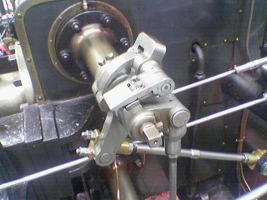

In [4]:
image =: readbmp <'image_mini.bmp'
viewrgb image

Let's take a look at first few elements of this file:

In [5]:
4 {. 4{."1 image

6582142 6119535 11446960 16579311
6647932 6316915  9078413 16183785
6583166 6186100  7696763 15131099
6320507 6581372  6841715 13485764

...this doesn't look familiar at all! That's because J read all three RGB values as a single integer. You could describe this with a formula:

`number = (r^3) + (g^2) + (b^1)`

Thankfully, retriving them is easy:

In [6]:
rgbimage =: 256 256 256 #:"1 0 image
4 {. 4 {."1 <"1 rgbimage

┌───────────┬───────────┬───────────┬───────────┐
│100 111 126│93 96 111  │174 170 176│252 250 239│
├───────────┼───────────┼───────────┼───────────┤
│101 112 124│96 99 115  │138 134 141│246 241 233│
├───────────┼───────────┼───────────┼───────────┤
│100 115 126│94 100 116 │117 113 123│230 225 219│
├───────────┼───────────┼───────────┼───────────┤
│96 113 123 │100 108 124│104 101 115│205 198 196│
└───────────┴───────────┴───────────┴───────────┘

Okay, now that we got RGB values, let's get rid of them. Colors aren't that important is basic edge detection, so we'll convert the image to grayscale. I go the easy way and just calculate the average of these three values.

In [7]:
greyimage =: 3 %~ (+/"1) rgbimage

If I wanted to see this greyscale image right now, I have to convert it back to a format similar to the original one. Here I just floor the numbers, make them in to RGB triples of the same values, convert into single numbers and pass to `viewrgb` function.

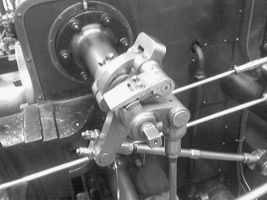

In [8]:
viewrgb 256 #. 3 #"0 <. greyimage

Okay, now let's get to the actual algorithm. The first thing I do is cutting the matrix into 3x3 overlapping slices.

In [9]:
cells =: 3 3 ,.;._3 greyimage

As you can see below, they always overlap - these are basically all 3x3 areas in the image.

In [10]:
3 {. 3 {."1 <"2 <. cells

┌───────────┬───────────┬───────────┐
│112 100 173│100 173 247│173 247 253│
│112 103 137│103 137 240│137 240 250│
│113 103 117│103 117 224│117 224 250│
├───────────┼───────────┼───────────┤
│112 103 137│103 137 240│137 240 250│
│113 103 117│103 117 224│117 224 250│
│110 110 106│110 106 199│106 199 249│
├───────────┼───────────┼───────────┤
│113 103 117│103 117 224│117 224 250│
│110 110 106│110 106 199│106 199 249│
│109 114  92│114  92 173│ 92 173 243│
└───────────┴───────────┴───────────┘

Now let's just piecewise multiply each cell with the sobel matrix, then sum all nine resulting values - and we get the resulting pixel value. Repeat for the second matrix.

In [11]:
partial1 =: +/"1 +/"1 sobel1 *"2 cells
partial2 =: +/"1 +/"1 sobel2 *"2 cells

The last thing we need to do is to combine these two images. I'll use the simple formula `pixel = sqrt(pixel1^2 + pixel2 ^2)`. Finally I'll make sure that no pixel is above 255 by capping theis values.

In [12]:
combine =: [: %: *:@[ + *:@]
limit =: 255 <. ]

In [13]:
newimage =: limit partial1 combine partial2

Finally, let's display the result, like I did above.

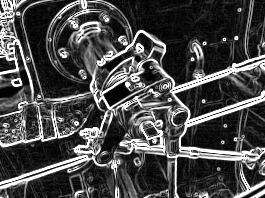

In [14]:
viewrgb 256 #. 3 #"0 <. newimage